In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [59]:
start='2010-01-01'
end='2022-12-31'
df=data.DataReader('AAPL','stooq',start,end)
df=df.iloc[::-1]
df.head()


Open     High      Low    Close        Volume
Date                                                        
2010-01-04  6.49958  6.53008  6.46597  6.51522  5.764890e+08
2010-01-05  6.53905  6.56358  6.49230  6.52639  7.055130e+08
2010-01-06  6.52639  6.55241  6.41553  6.42221  6.452991e+08
2010-01-07  6.44444  6.45421  6.36409  6.41085  5.588893e+08
2010-01-08  6.40586  6.45421  6.36458  6.45401  5.246856e+08

In [56]:
df.tail()

Open     High      Low    Close        Volume
3267  6.40586  6.45421  6.36458  6.45401  5.246856e+08
3268  6.44444  6.45421  6.36409  6.41085  5.588893e+08
3269  6.52639  6.55241  6.41553  6.42221  6.452991e+08
3270  6.53905  6.56358  6.49230  6.52639  7.055130e+08
3271  6.49958  6.53008  6.46597  6.51522  5.764890e+08

In [60]:
df=df.reset_index()
df.head()

Date     Open     High      Low    Close        Volume
0 2010-01-04  6.49958  6.53008  6.46597  6.51522  5.764890e+08
1 2010-01-05  6.53905  6.56358  6.49230  6.52639  7.055130e+08
2 2010-01-06  6.52639  6.55241  6.41553  6.42221  6.452991e+08
3 2010-01-07  6.44444  6.45421  6.36409  6.41085  5.588893e+08
4 2010-01-08  6.40586  6.45421  6.36458  6.45401  5.246856e+08

In [61]:
df=df.drop('Date',axis=1)
df.head()

Open     High      Low    Close        Volume
0  6.49958  6.53008  6.46597  6.51522  5.764890e+08
1  6.53905  6.56358  6.49230  6.52639  7.055130e+08
2  6.52639  6.55241  6.41553  6.42221  6.452991e+08
3  6.44444  6.45421  6.36409  6.41085  5.588893e+08
4  6.40586  6.45421  6.36458  6.45401  5.246856e+08

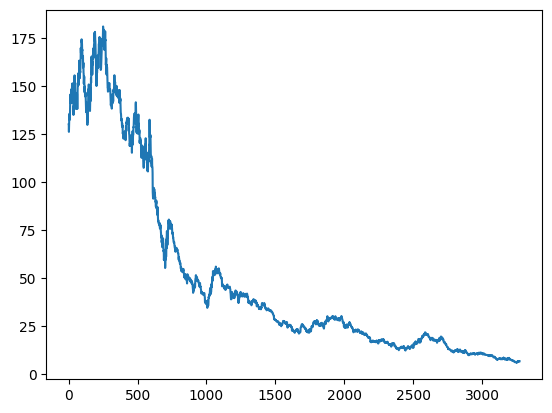

In [14]:
plt.plot(df.Close)

In [62]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3267    150.34697
3268    149.99421
3269    149.60385
3270    149.25398
3271    148.90681
Name: Close, Length: 3272, dtype: float64

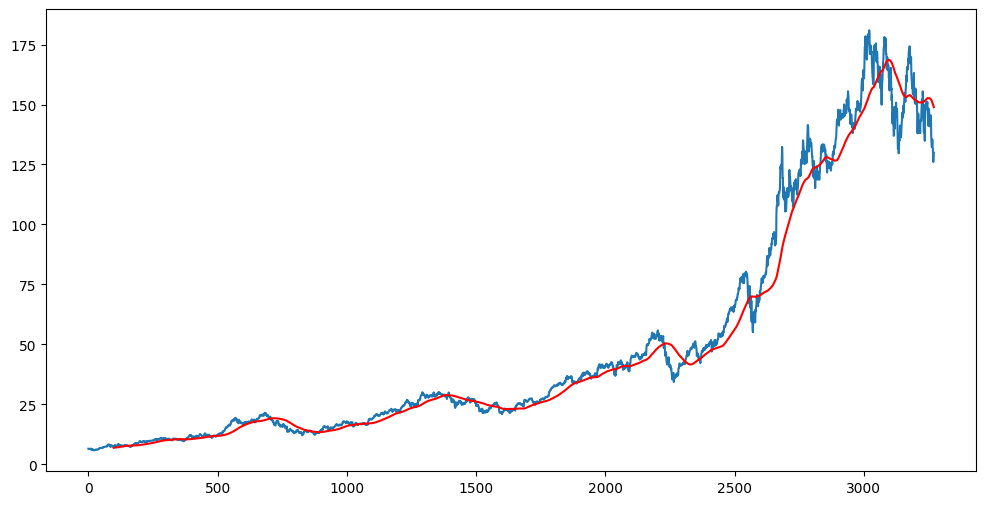

In [63]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,color='red')

In [64]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    151.767550
3268    151.647550
3269    151.528040
3270    151.404145
3271    151.259420
Name: Close, Length: 3272, dtype: float64

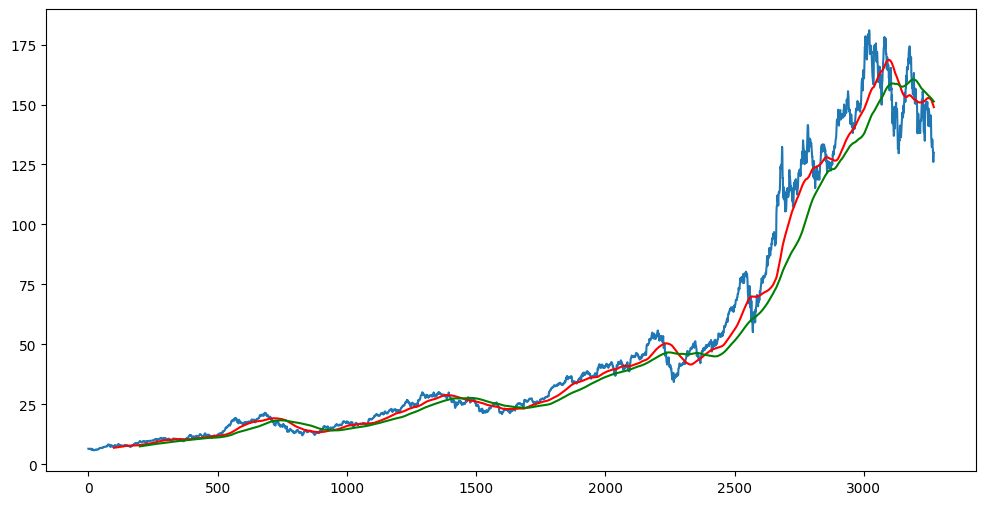

In [65]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,color='red')
plt.plot(ma200,color='green')

In [19]:
df.shape

(3272, 5)

In [66]:
#splitting the data into training and testing
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_train.shape,data_testing.shape)

(2290, 1) (982, 1)


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [68]:
data_training_array=scaler.fit_transform(data_train)
data_training_array

array([[0.01338642],
       [0.01361001],
       [0.01152464],
       ...,
       [0.72424467],
       [0.72454493],
       [0.70861934]])

In [69]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
print(x_train,y_train)



[array([[1.33864240e-02],
       [1.36100148e-02],
       [1.15246351e-02],
       [1.12972411e-02],
       [1.21611783e-02],
       [1.10137992e-02],
       [9.55895761e-03],
       [1.13310699e-02],
       [1.05866346e-02],
       [8.45141244e-03],
       [1.40191640e-02],
       [1.19996405e-02],
       [9.75852793e-03],
       [3.46815973e-03],
       [6.72714094e-03],
       [8.45541585e-03],
       [9.64282919e-03],
       [4.41436722e-03],
       [4.00341652e-06],
       [1.64039992e-03],
       [2.31277372e-03],
       [4.37433306e-03],
       [0.00000000e+00],
       [2.07937454e-03],
       [1.27128491e-03],
       [2.52835770e-03],
       [1.88580935e-03],
       [4.04104863e-03],
       [5.07473078e-03],
       [6.92070613e-03],
       [6.39785993e-03],
       [6.63726424e-03],
       [5.86320366e-03],
       [5.09875127e-03],
       [3.05720902e-03],
       [5.25848759e-03],
       [6.06457551e-03],
       [7.65913631e-03],
       [1.03274134e-02],
       [1.02513485e-02],

In [70]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [71]:
x_train.shape

(2190, 100, 1)

In [72]:
#ML model

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [73]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_8 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_9 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_10 (LSTM)              (None, 120)              

In [75]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 17s 169ms/step - loss: 0.0258
Epoch 2/50
69/69 [==============================] - 12s 174ms/step - loss: 0.0062
Epoch 3/50
69/69 [==============================] - 12s 178ms/step - loss: 0.0050
Epoch 4/50
69/69 [==============================] - 13s 193ms/step - loss: 0.0050
Epoch 5/50
69/69 [==============================] - 12s 177ms/step - loss: 0.0046
Epoch 6/50
69/69 [==============================] - 12s 174ms/step - loss: 0.0041
Epoch 7/50
69/69 [==============================] - 12s 172ms/step - loss: 0.0040
Epoch 8/50
69/69 [==============================] - 12s 173ms/step - loss: 0.0041
Epoch 9/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0034
Epoch 10/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0041
Epoch 11/50
69/69 [==============================] - 12s 174ms/step - loss: 0.0031
Epoch 12/50
69/69 [==============================] - 12s 173ms/step - loss: 0.0028
Epoch 13/50
6

In [33]:
model.save('stock_model.h5')

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_8 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_9 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_10 (LSTM)              (None, 120)              

In [53]:
import pickle


In [78]:
from keras.models import load_model
model.save('model.h5')
model_final = load_model('model.h5')

In [54]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://b0c05732-0447-4664-a4c1-b8c04aaa3452/assets


In [79]:
past_100=data_train.tail(100)

In [80]:
final_df=past_100.append(data_testing,ignore_index=True)

C:\Users\sohail\AppData\Local\Temp\ipykernel_13556\2181114283.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100.append(data_testing,ignore_index=True)


In [81]:
final_df.head()

Close
0  53.8258
1  52.3882
2  52.4769
3  52.5088
4  52.9036

In [82]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13308276],
       [0.12327973],
       [0.12388458],
       ...,
       [0.62551296],
       [0.64985687],
       [0.65203896]])

In [83]:
input_data.shape

(1082, 1)

In [84]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [85]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(982, 100, 1) (982,)


In [86]:
#making predictions
y_predicted=model.predict(x_test)


In [91]:
y_predicted

array([[ 25.450075],
       [ 25.703407],
       [ 25.97265 ],
       [ 26.248354],
       [ 26.522247],
       [ 26.787327],
       [ 27.038109],
       [ 27.269333],
       [ 27.477137],
       [ 27.663834],
       [ 27.831966],
       [ 27.985945],
       [ 28.12958 ],
       [ 28.26601 ],
       [ 28.395449],
       [ 28.51863 ],
       [ 28.637577],
       [ 28.753239],
       [ 28.86446 ],
       [ 28.967157],
       [ 29.057777],
       [ 29.141285],
       [ 29.2266  ],
       [ 29.321463],
       [ 29.432934],
       [ 29.567852],
       [ 29.732014],
       [ 29.925615],
       [ 30.146767],
       [ 30.400633],
       [ 30.685219],
       [ 30.990479],
       [ 31.30188 ],
       [ 31.607773],
       [ 31.899479],
       [ 32.172367],
       [ 32.425854],
       [ 32.664795],
       [ 32.89602 ],
       [ 33.12509 ],
       [ 33.357075],
       [ 33.599384],
       [ 33.855488],
       [ 34.126896],
       [ 34.40942 ],
       [ 34.696392],
       [ 34.981194],
       [ 35.2

In [87]:
scaler.scale_

array([0.00681902])

In [89]:
scale_factor=1/0.0681902
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


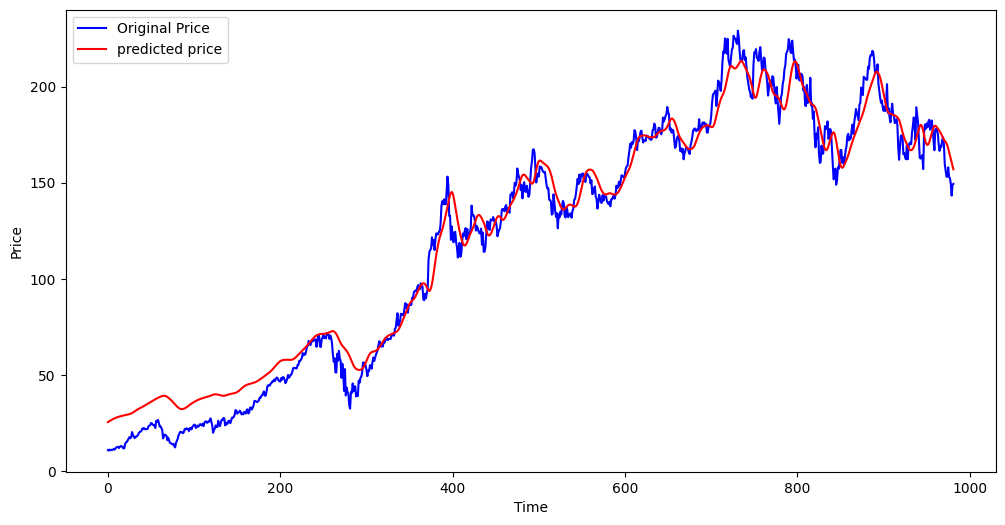

In [90]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label="predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()